# **Project Name**    - **AirBnb Booking Analysis**



# **Project Summary -**

**Airbnb takes a unique approach to accommodations. Part of the "sharing economy," Airbnb offers you someone's home to stay in instead of a hotel. This dataset from Airbnb consists of a unique dataset of guests and hosts from 2011, with which we analyze the data to enhance travel possibilities. Analyzing the data on the millions of listings provided by Airbnb is a major challenge for the company. These millions of lists generate a lot of data – data that can be analyzed and used for security, business decisions, the behavior of customers and providers (hosts), and performance on the platform, to guide marketing initiatives, implement innovative additional services, and much more. Can be used for some. More.**

# **Problem Statement**




*   What can we learn from past information? (ex: location, price, reviews, etc.)
*   What are the most popular neighborhoods and property types for Airbnb rentals?
*   How do factors like price, location, and property type affect occupancy rates and guest satisfaction?
*   What are the key features that guests look for in Airbnb listings, and how can hosts optimize their listings to meet these preferences?
*   How do seasonal and regional variations impact demand for Airbnb rentals?
*   What are the best practices for pricing, marketing, and managing Airbnb listings to maximize profits and minimize risks?







#### **Define Your Business Objective?**

**This problem statement highlights the need to gain a deeper understanding of the underlying patterns and relationships in Airbnb booking data. AirBnb's EDA aims to uncover guest and host trends, patterns or anomalies in the data that may impact customer booking decisions.**

# ***Let's Start !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool
import datetime

import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv('/content/drive/MyDrive/Data Science/AirBnb EDA/Airbnb NYC 2019.csv',parse_dates=['last_review'])

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(48895, 16)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  object        
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  object        
 4   neighbourhood_group             48895 non-null  object        
 5   neighbourhood                   48895 non-null  object        
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  object        
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<AxesSubplot:>

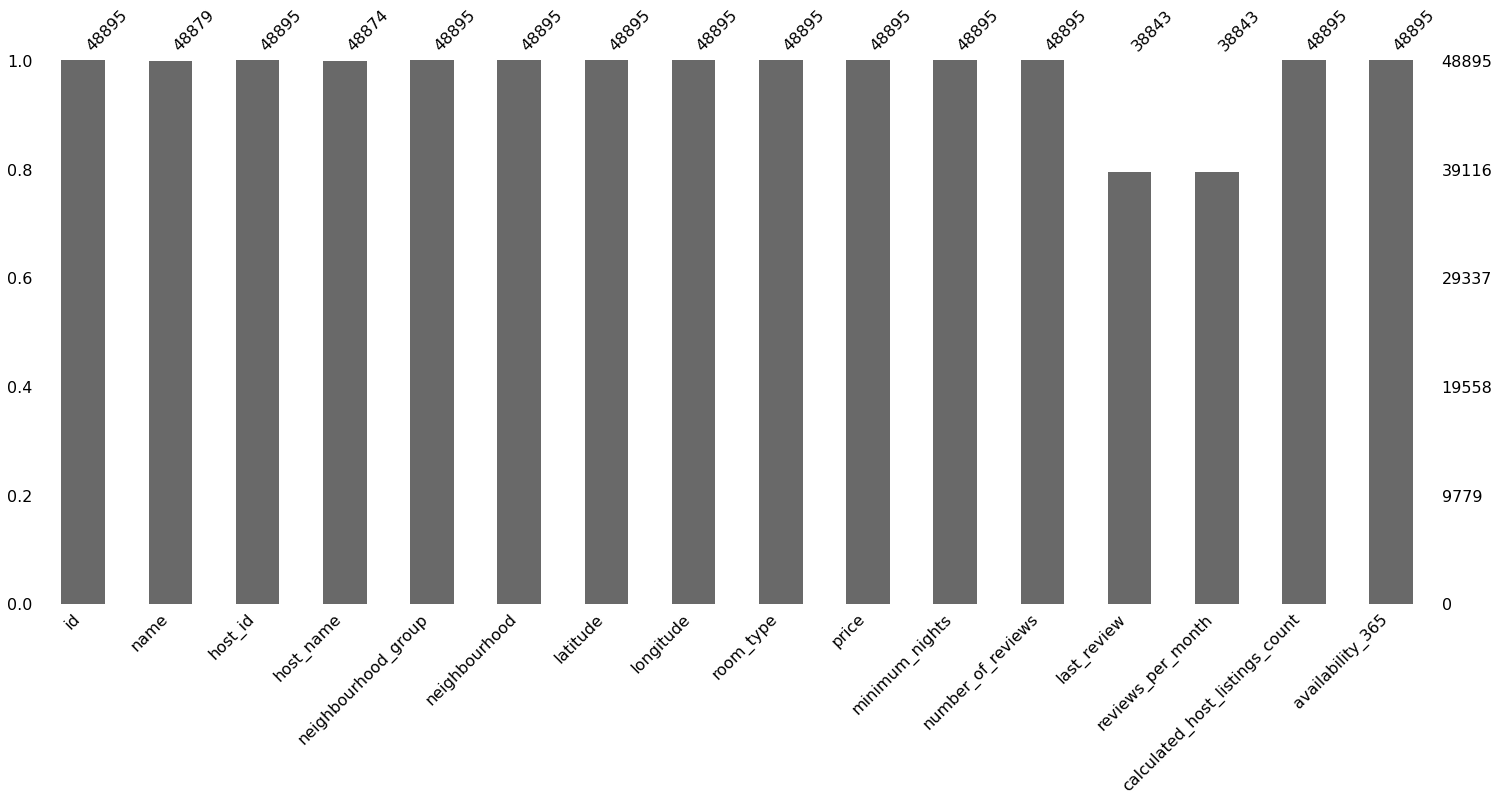

In [ ]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

This dataset is a dataset of airbnb's hosts and guests, and we have to churn the data given by the host and guests and at the same time to fully analyze the insight behind it.
The given data has 48895 rows and 16 columns, which have no duplicate value but there are some missing values but it does not have more number due to which we can consider this data for analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description

* The variables of the given data are as follows:

* id: This is the unique numerical value for each booking

* name: Speciality of rooms

* host_id: A different numerical number of the host

* host_name: It has the name of the host of the guest

* neighborhood_group: It has groups around the location

* neighborhood: In the nearby place.

* latitude: Numerical value, location position.

* longitude: Numerical value, location position.

* room_type: Which types of rooms? Like-Private, shared or complete/house, classified value.

* price: Numerical value of room cost

* minimum_nights: How many days it is mandatory to stay?

* number_of_reviews: Total number of reviews for the host

* last_review: Information about the last reviews

* reviews_per_month: Total number of reviews in this months

* calculated_host_listing_count: The total number of bedrooms to the landlord.

* availability_365: It is available for 365 days or not

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Drop any columns that are not needed for analysis
df.drop(['id', 'host_id', 'latitude', 'longitude'], axis=1, inplace=True)


In [ ]:
# Rename columns to make them more meaningful
df.rename(columns={'name': 'room_title'}, inplace=True)

In [ ]:
# Convert date strings to datetime objects
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

In [ ]:
# Fill in missing values of the column
df.fillna(0)

,room_title,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,Private room,149,1,9,2018-10-19 00:00:00,0.21,6,365
1,Skylit Midtown Castle,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21 00:00:00,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,Private room,150,3,0,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05 00:00:00,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19 00:00:00,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,Private room,40,4,0,0,0.00,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,Entire home/apt,115,10,0,0,0.00,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,Shared room,55,1,0,0,0.00,6,2


In [ ]:
# find maximum values of columns
maxValues = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month']].max().astype('int64')
print(maxValues)

minimum_nights                    1250
number_of_reviews                  629
calculated_host_listings_count     327
reviews_per_month                   58
dtype: int64


In [ ]:
# find minimum values of columns
minValues = df[['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'reviews_per_month']].min().astype('int64')
print(minValues)

minimum_nights                    1
number_of_reviews                 0
calculated_host_listings_count    1
reviews_per_month                 0
dtype: int64


In [ ]:
# Get the count of each unique value in the column
df.nunique()

room_title                        47905
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# Filter the data to only include rows where a certain condition is met
df1 = df[df['reviews_per_month'] >= 1]
df2 = df[ (df['reviews_per_month'] <= 2) & (df['reviews_per_month'] >= 1 )]
df3 = df[ (df['reviews_per_month'] <= 3) & (df['reviews_per_month'] >= 2 )]
df4 = df[ (df['reviews_per_month'] <= 4) & (df['reviews_per_month'] >= 3 )]
df5 = df[ (df['reviews_per_month'] <= 5) & (df['reviews_per_month'] >= 4 )]
df6 = df[df['reviews_per_month'] >= 5]
df7 = df[df['reviews_per_month'] >= 10]
df8 = df[df['reviews_per_month'] >= 20]


(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape, df7.shape, df8.shape)

((16801, 12),
 (7036, 12),
 (4544, 12),
 (2862, 12),
 (1650, 12),
 (1552, 12),
 (89, 12),
 (3, 12))

In [ ]:
# find which value is the most frequent in a row of neighbourhood_group
df['neighbourhood_group'].value_counts()


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
# # find which value is the most frequent in a row of neighbourhood
df['neighbourhood'].value_counts()


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

In [ ]:
# find which value is the most frequent in a row of room_type

df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### What all manipulations have you done and insights you found?

**First of all, I dropped the columns which were not of use to me. Then I renamed a column. Then brought the date time column to the date time format. After that I thought that any numerical column which has null value was replaced with mean value so that there would be no problem in analysis. Then I got the maximum and minimum value of the numerical column. Also I checked how many unique values are there in each column. Also, I compared how many hosts are getting good reviews in a month. Then I checked which groups booked the most and which were the neighborhood cities that people visited the most.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

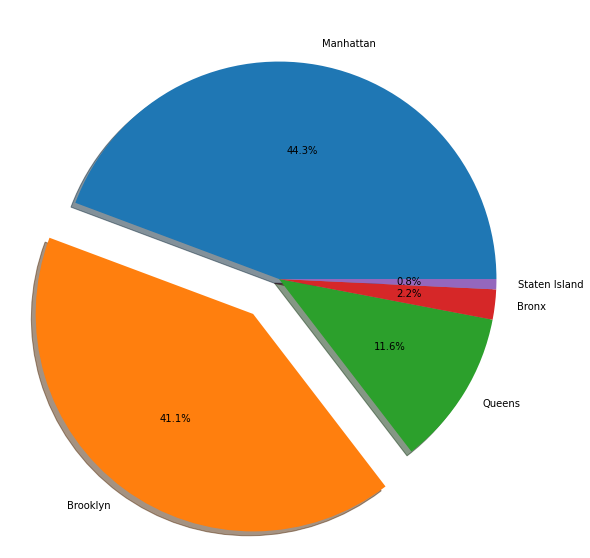

In [ ]:
# Chart - 1 visualization code
chart1= df['neighbourhood_group'].value_counts()
explode = (0, 0.2, 0, 0,0)
fig, ax = plt.subplots(figsize =(15, 10))
ax.pie(chart1, labels = df['neighbourhood_group'].value_counts().index, autopct='%1.1f%%', shadow=True, explode = explode)
plt.show()

##### 1. Why did you pick the specific chart?

* **Because from this I will know what are the ratio of neighborhood_group in this data.**

##### 2. What is/are the insight(s) found from the chart?

* **As per the insight from the chart, there are only two groups whose ratio is highest and the rest are very low.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.**

* **The insight from this data set is to understand which places most
people go for and also understand that if a property is present in this area it will get regular customers and more profit.**

#### Chart - 2

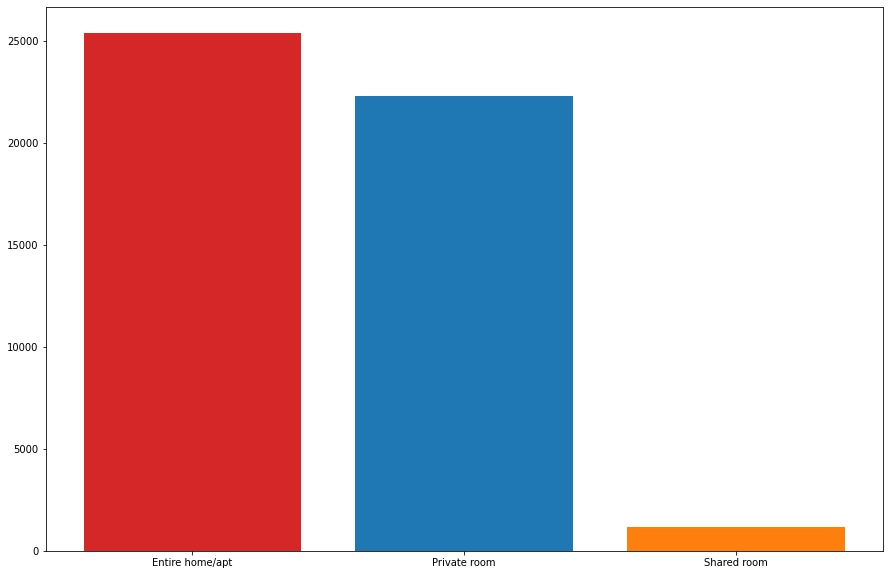

In [ ]:
# Chart - 2 visualization code
chart2= df['room_type'].value_counts()
x = df['room_type'].value_counts().index
y = df['room_type'].value_counts()
bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
fig, ax = plt.subplots(figsize =(15, 10))
plt.bar(x, y, color=bar_colors)

plt.show()

##### 1. Why did you pick the specific chart?

**Because i wanted to know how many types of rooms are there in this data set.**

##### 2. What is/are the insight(s) found from the chart?

**I found three types of rooms in this data set**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**It is being known from the received insights that most people prefer to take Entire Home / Apartment or if you have a private room then people like to take that too. On the other hand, if you have a shared room, then people like to take it very less.**

#### Chart - 3

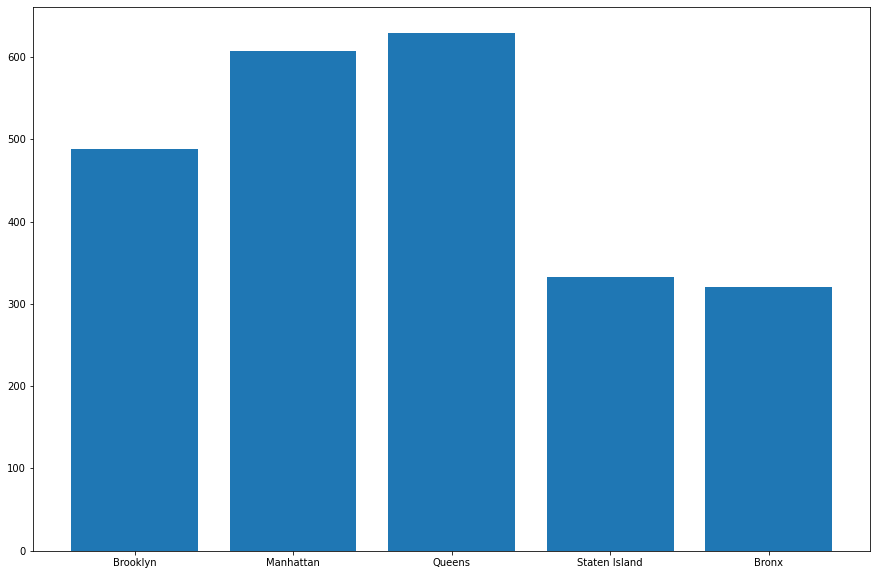

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(15,10))
plt.bar(df['neighbourhood_group'], df['number_of_reviews'])
plt.show()


##### 1. Why did you pick the specific chart?

**Because I want to know how many reviews neighborhood_group has got in this data set**

##### 2. What is/are the insight(s) found from the chart?

**Queens and Manhattan got the most reviews and the rest got less than that.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**We can further analyze this information by using the host ID that has the most reviews and we can analyze what type of room it is hosting. Also what is he doing so that people are compelled to give him reviews**

#### Chart - 4

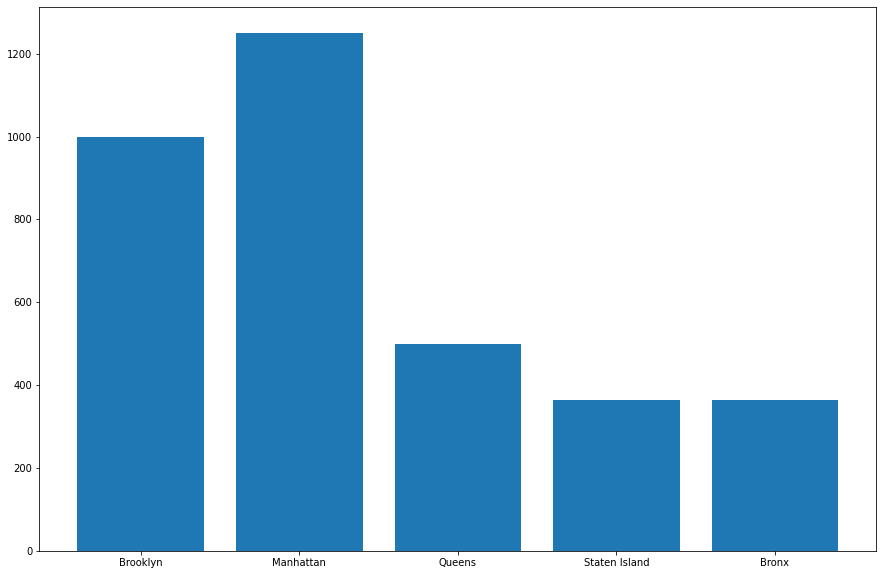

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(15,10))
plt.bar(df['neighbourhood_group'], df['minimum_nights'])
plt.show()

##### 1. Why did you pick the specific chart?

**Because I want to know which neighborhood_groups want to stay maximum number of nights in this data set.**

##### 2. What is/are the insight(s) found from the chart?

**Manhattan leads in Insights, followed by the rest**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**If it is a matter of night stay, then the thing to be seen in that is why people stay there so much.**

#### Chart - 5

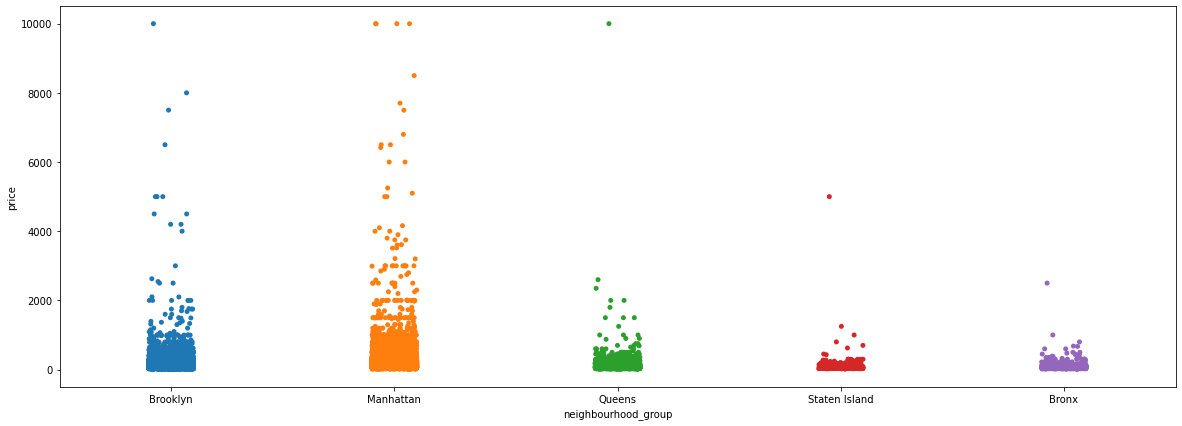

In [ ]:
# Chart - 5 visualization code

plt.figure(figsize=(20,7))
sns.stripplot(df['neighbourhood_group'], df['price'])
plt.show()

##### 1. Why did you pick the specific chart?

**I have to plot neighborhood_group and price here for analysis.**

##### 2. What is/are the insight(s) found from the chart?

**In Insights I found that there are many properties with rents starting from $1000. The rent of such a property is going up to $10,000. The same price has changed a lot in comparison to the neighborhood_group.**

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**From this analysis we are finding that the price is higher in Manhattan. Whereas most hosts cost less than $500. This gives the information that people prefer low cost places to expensive places.**

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**In our analysis, it is being found that Manhattan is at the forefront of the data set we have. We should see from this that you should keep your room accoding to the price. People want to get a good room in good money.**

# **Conclusion**

**In this analytics project, individual cases were analyzed on a given dataset to help make better business decisions and analyze trends, which could lead to new and improved products and services. It is found that most bookings are for "Manhattan" followed by "Brooklyn", "Queens".**